# GLM - Modelo linear generalizado.
é uma genarização flexivel de regressão linear ordinária que permite variáveis de resposta que têm modelos de distribuição de erro diferentes de uma distribuição normal. O MLG generaliza a regresão linear permitindo que o modelo linear seja relacionado á variável de resposta por meio de uma função de ligação e permitindo que a magnitude de variância de cada medição seja uma função de seu valor previsto. 
* Regressçao linear.
* Regressão logística.
* Regressão Poisson.
## Definição :
$$\eta_i = \alpha + \beta_1 \cdot X_{1i} + \beta_2 \cdot X_{2i} + ... + \beta_k \cdot X_{ki}$$



## Tabela de caracteristicas.

![img](https://www.imagemhost.com.br/images/2021/09/14/GLM_tabela.png)

* $p$ probabilidade.
* $p_m$ probabilidades com indice m.
* $\lambda$ valores previstos de $y$.

## Aplicações :
* O primeiro são os dados de contagens, como número de carros que passam em uma rodovia a cada minuto, número de homicídios por dia em determinada cidade e número de reclamações de uma determinada cidade e número de reclamações de uma determinada seguradora por cliente.
* O segundo grupo são para dados categóricos que são os mais conhecidos, algumas aplicações são as transações bancárias fraudulentas, uso ou não de um seguro de carro durante período contratado, a oscilação positiva ou negativa de uma ação.
* O terceiro grupo, menos conhecidos são dados assimétricos positivos, uma aplicação seria dados de precipitação ou temperatura de determinada cidade.

## Tipos de resposta e distribuições.
* Contgem: modelo de Poisson.
* Binária: modelo de Bernoulli.
* Categórica: modelo multinomial.
* Contínua assimétrica: modelo gama.

## Componentes do modelo.
* Uma família exponencial de distribuição de probabilidade.
* Um preditor linear $\eta = X\beta$.
* Uma função de ligação $g$ tal que $E(Y|X) = \mu =g^{-1}(\eta)$

# Prática.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


In [3]:
data = pd.read_csv('column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


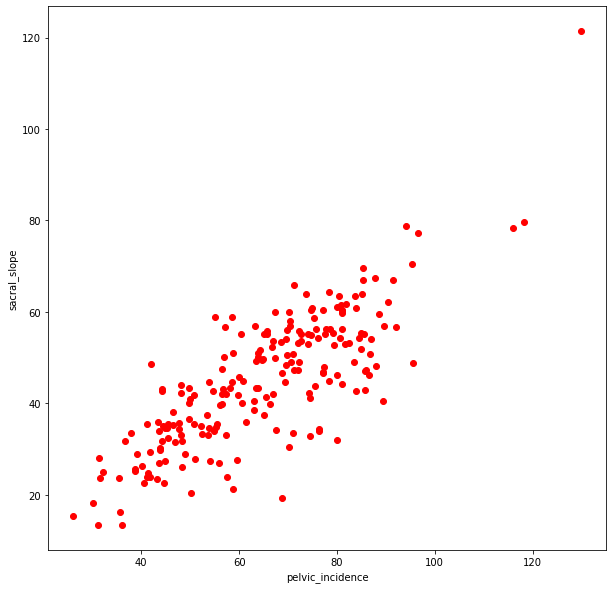

In [7]:
data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y,color = 'r')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997


In [13]:
ridge_predict

array([[40.52670197],
       [44.83503281],
       [51.13845716],
       [48.47663842],
       [34.89427848],
       [47.12533646],
       [39.40746053],
       [36.81198337],
       [39.08275498],
       [43.22655987],
       [52.91640049],
       [34.36482865],
       [41.11700485],
       [33.6086137 ],
       [58.66120688],
       [46.11074736],
       [26.10748479],
       [57.94462546],
       [51.92739445],
       [57.60071252],
       [47.27213886],
       [32.2974022 ],
       [28.83405104],
       [50.86895979],
       [46.89979732],
       [33.78339666],
       [37.02356416],
       [39.00095911],
       [36.34728689],
       [60.19098153],
       [30.34507234],
       [52.44918732],
       [31.25694261],
       [49.13069734],
       [48.04694905],
       [43.30156173],
       [48.32009946],
       [45.80397077],
       [41.27275154],
       [25.32367877],
       [31.79825376],
       [49.32163924],
       [42.17044397],
       [34.30782364],
       [51.35836461],
       [56

In [11]:
GLM_poison = np.log(ridge_predict) 

In [22]:
GLM_poison

array([[3.70196106],
       [3.80298982],
       [3.9345368 ],
       [3.881082  ],
       [3.55232288],
       [3.85281079],
       [3.67395515],
       [3.60582343],
       [3.66568132],
       [3.76645512],
       [3.96871332],
       [3.53703362],
       [3.71642178],
       [3.51478239],
       [4.07177864],
       [3.83104605],
       [3.26222205],
       [4.05948782],
       [3.94984648],
       [4.05353494],
       [3.85592109],
       [3.4749868 ],
       [3.36155702],
       [3.92925291],
       [3.84801335],
       [3.51996946],
       [3.61155458],
       [3.66358624],
       [3.59311956],
       [4.09752253],
       [3.41263414],
       [3.95984484],
       [3.44224151],
       [3.89448404],
       [3.87217864],
       [3.7681887 ],
       [3.87784761],
       [3.82437079],
       [3.72020251],
       [3.23173988],
       [3.45941138],
       [3.89836291],
       [3.7417196 ],
       [3.53537342],
       [3.93882782],
       [4.04160849],
       [4.05848124],
       [3.900

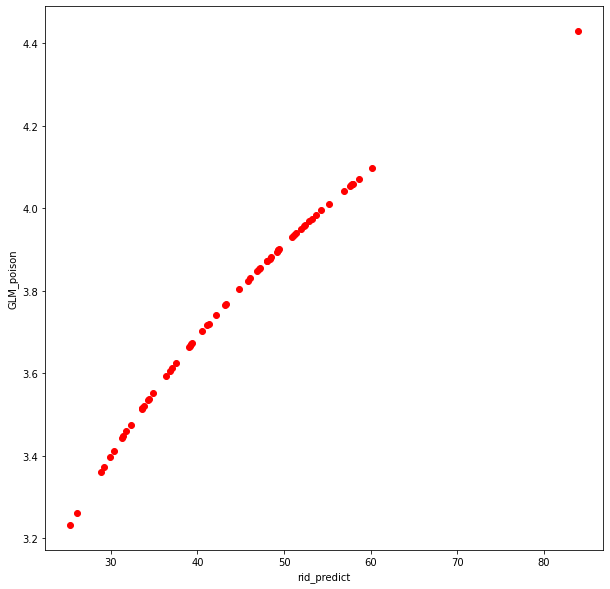

In [15]:
plt.figure(figsize=[10,10])
plt.scatter(x=ridge_predict,y=GLM_poison ,color = 'r')
plt.xlabel('rid_predict')
plt.ylabel('GLM_poison')
plt.show()